In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt

f_mnist=keras.datasets.fashion_mnist
(X_train,Y_train),(X_test,Y_test)=f_mnist.load_data()

x_train=X_train/255
x_test=X_test/255

print(x_train.shape)
print(x_test.shape)


2023-08-28 18:08:01.602135: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-28 18:08:01.903058: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-28 18:08:01.903098: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-08-28 18:08:01.925083: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-28 18:08:03.757045: W tensorflow/stream_executor/platform/de

In [6]:

model=tf.keras.models.Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),layers.MaxPool2D(),layers.Conv2D(32,(3,3),activation='relu'),layers.MaxPool2D(),layers.Conv2D(64,(5,5),activation='relu'),layers.Flatten(),layers.Dense(48,activation='relu'),layers.Dense(10,activation='softmax')])

model.summary()
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

history=model.fit(x_train,Y_train,epochs=5,validation_split = 0.2)


print(x_train.shape)





Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 64)          51264     
                                                                 
 flatten_1 (Flatten)         (None, 64)               

In [7]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 72.2592 - accuracy: 0.8012


[72.25924682617188, 0.8011999726295471]

In [8]:
print(history.history['accuracy'])

[0.6198333501815796, 0.7628333568572998, 0.800208330154419, 0.8229791522026062, 0.8372083306312561]


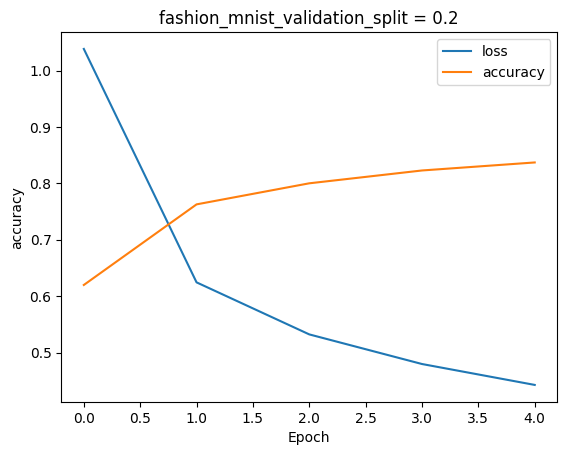

In [10]:

plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('By mnist_test_data')
plt.legend(loc='upper right')

plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['accuracy'], label = 'accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('fashion_mnist_validation_split = 0.2')
plt.legend(loc='upper right')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7b7e996c-5e37-4380-88a4-b0cdb0d76861' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>